# Basic Network

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Activation, Dense, Embedding, Flatten
from keras.regularizers import l2
from sklearn.model_selection import train_test_split

## Data

In [4]:
data_file = "../data/processed/stacking-data.h5"
df = pd.read_hdf(data_file, "data")

## Model

In [7]:
def get_model(input_length, output_length):
    """
    Return a keras model
    """
    model = Sequential()

    # Embed weeks to a dense space
    model.add(Embedding(54, 10, input_length=input_length))
    model.add(Flatten())
    model.add(Dense(10, W_regularizer=l2(0.02)))
    model.add(Activation("tanh"))
    model.add(Dense(output_length))
                 
    model.compile(loss="mse", optimizer="rmsprop")
    
    return model

get_model(1, 4).summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_9 (Embedding)          (None, 1, 10)         540         embedding_input_9[0][0]          
____________________________________________________________________________________________________
flatten_9 (Flatten)              (None, 10)            0           embedding_9[0][0]                
____________________________________________________________________________________________________
dense_17 (Dense)                 (None, 10)            110         flatten_9[0][0]                  
____________________________________________________________________________________________________
activation_9 (Activation)        (None, 10)            0           dense_17[0][0]                   
___________________________________________________________________________________________

## Loop over all scores

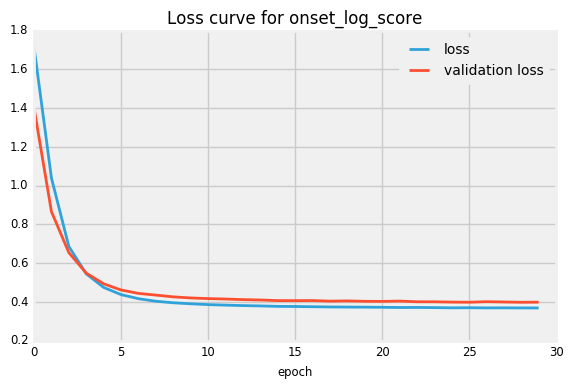

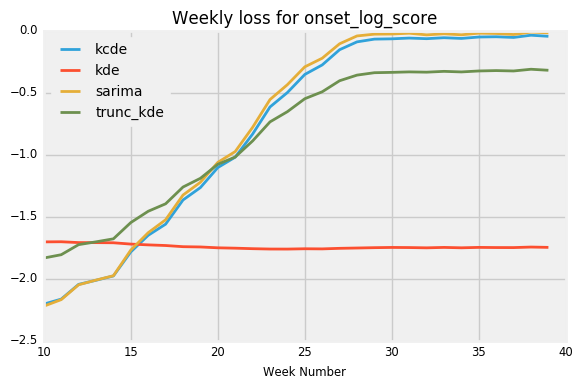

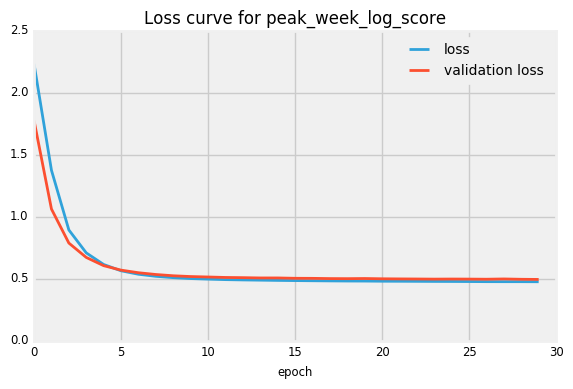

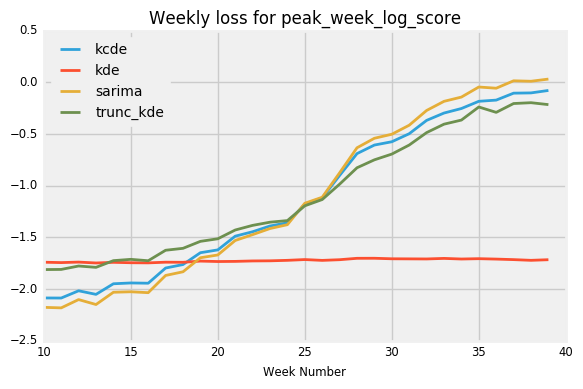

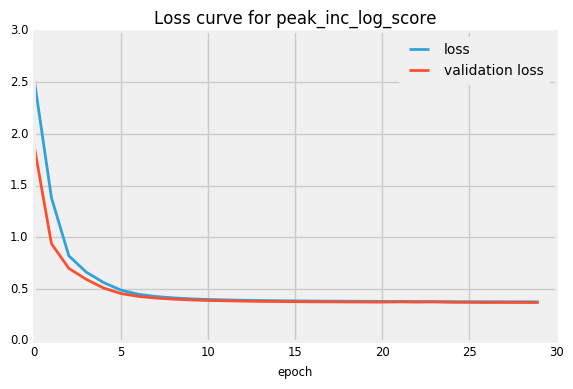

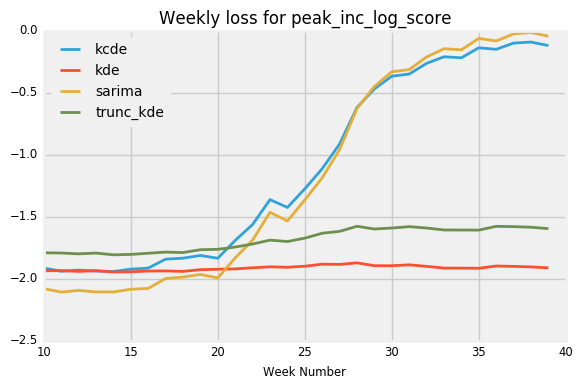

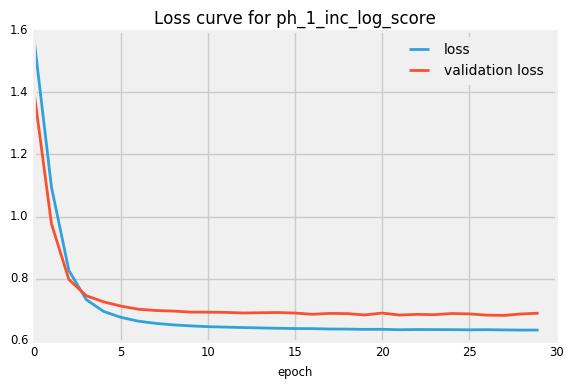

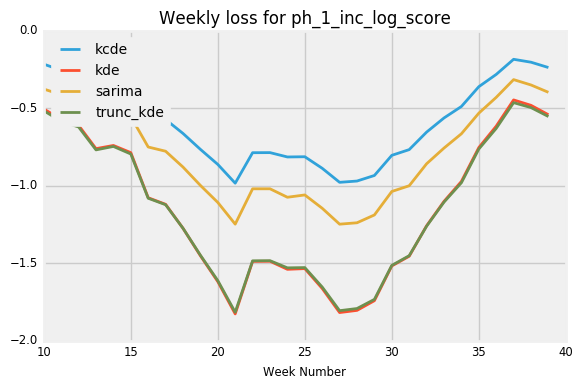

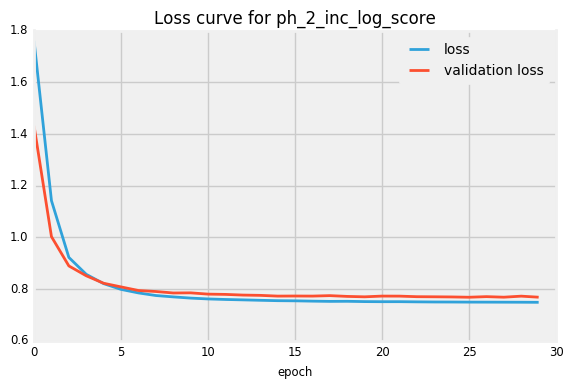

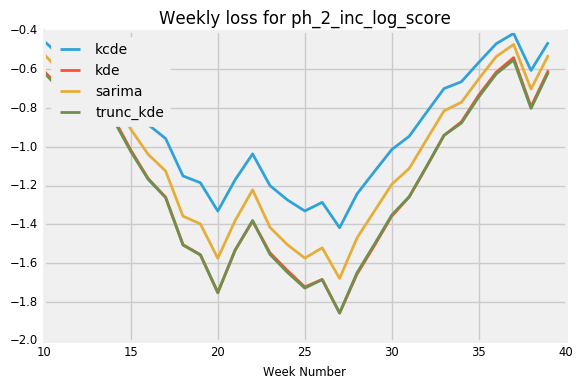

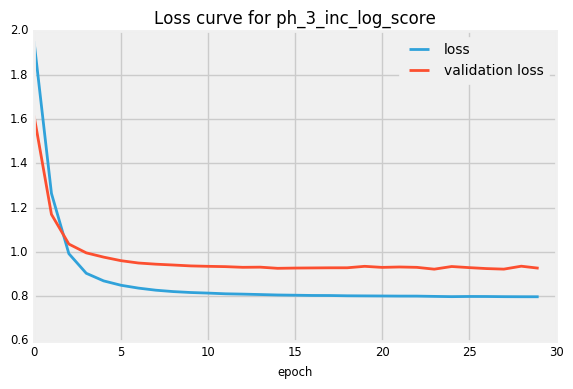

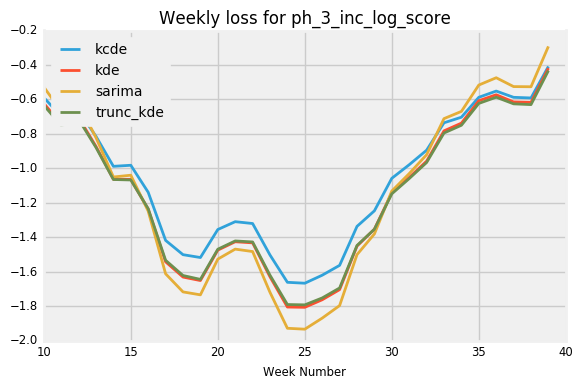

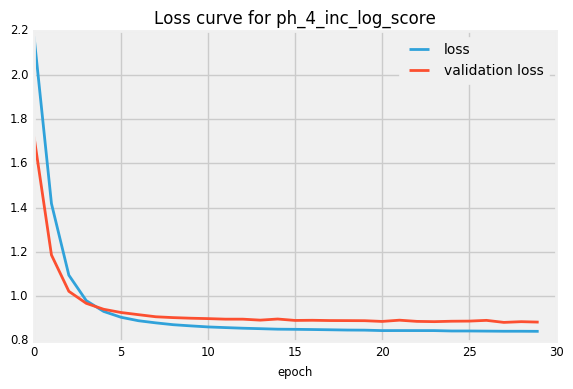

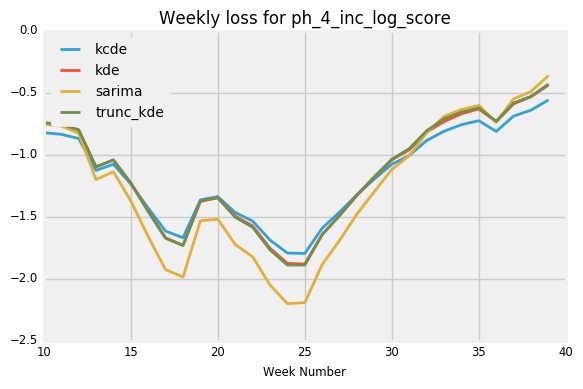

In [8]:
scores = df.columns.levels[0]


for score in scores:
    X = df[score].index.get_level_values("analysis_time_season_week").values
    y = df[score].as_matrix()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)
    
    model = get_model(1, y.shape[1])
    # Using test split for validation as of now
    history = model.fit(X_train, y_train, nb_epoch=30, validation_data=(X_test, y_test), verbose=0)
    
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="validation loss")
    plt.legend()
    plt.xlabel("epoch")
    plt.title("Loss curve for " + score)
    plt.show()

    weeks = np.arange(10, 40) # Only these weeks are available
    weights = model.predict(weeks)
    
    for idx, label in enumerate(df["onset_log_score"].columns):
        plt.plot(weeks, weights[:, idx], label=label)
    plt.legend(loc="upper left")
    plt.xlabel("Week Number")
    plt.title("Weekly loss for " + score)
    plt.show()